<a href="https://colab.research.google.com/github/oyane806/lets-stop-wildfires-hackathon/blob/master/wildfire_smoke_challenge_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs=64

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!gdown https://drive.google.com/uc?id=1jMD9TZENFvLUkehQ0Bxa2Ir-bGPovCx9

Downloading...
From: https://drive.google.com/uc?id=1jMD9TZENFvLUkehQ0Bxa2Ir-bGPovCx9
To: /content/diff2.zip
451MB [00:05, 87.6MB/s]


In [0]:
!unzip diff2.zip

In [0]:
data = ImageDataBunch.from_folder("diff2",
                                  train = 'train',
                                  valid='valid',
                                  ds_tfms=get_transforms(), 
                                  size=128, bs=bs).normalize(imagenet_stats)

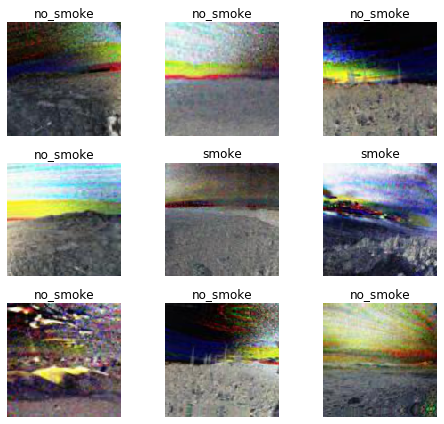

In [7]:
data.show_batch(rows=3, figsize=(7, 6))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [9]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.146406,0.094661,0.039014,06:28
1,0.080840,0.047718,0.018824,06:23
2,0.061359,0.036260,0.013694,06:15


In [19]:
ls

diff2/  diff2.zip  __MACOSX/  sample_data/


In [21]:
learn.save("/content/gdrive/My Drive/fastai/wildfires/stage-1", return_path=True)

PosixPath('/content/gdrive/My Drive/fastai/wildfires/stage-1.pth')

In [22]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.074305,0.038986,0.015928,06:14
1,0.049360,0.027504,0.011295,06:14
2,0.046377,0.024252,0.010177,06:12


In [23]:
learn.save("/content/gdrive/My Drive/fastai/wildfires/stage-2", return_path=True)

PosixPath('/content/gdrive/My Drive/fastai/wildfires/stage-2.pth')

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

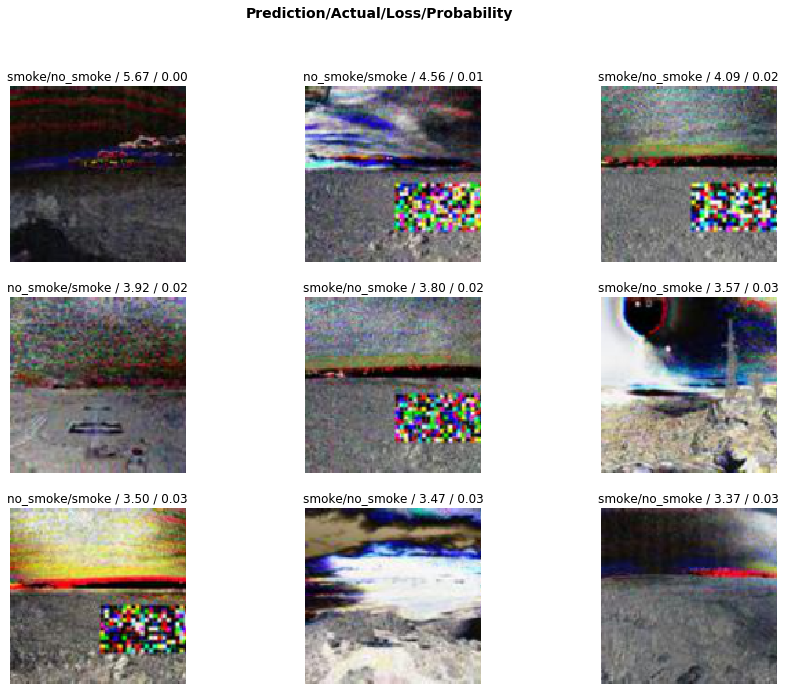

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

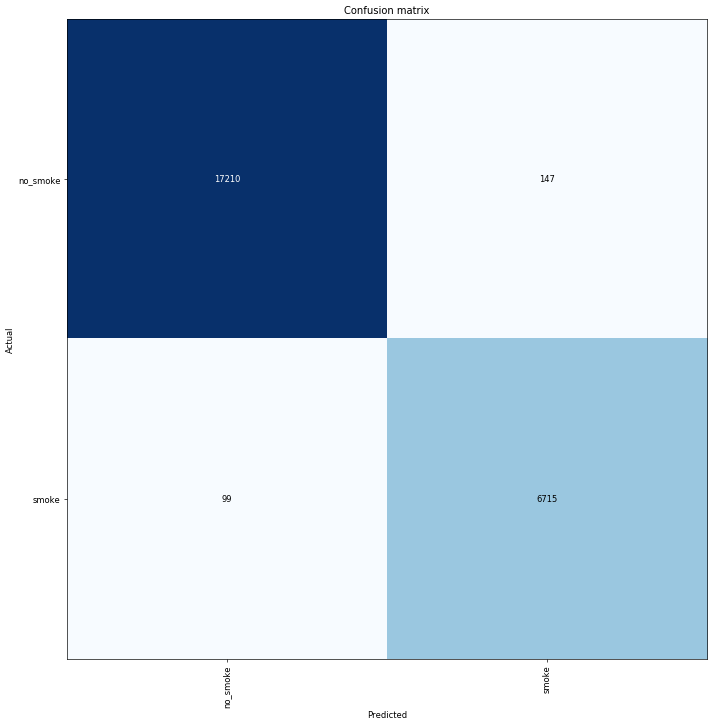

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


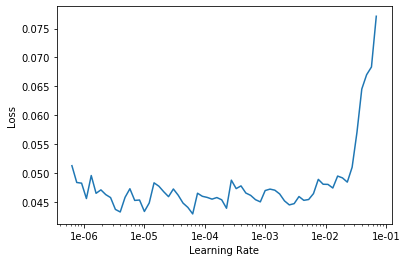

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.080542,0.053808,0.017252,06:37
1,0.052043,0.033923,0.011626,06:40
2,0.026822,0.011174,0.004344,06:39
3,0.016087,0.011766,0.004592,06:40
4,0.009327,0.006166,0.002524,06:39


In [0]:
learn.save("/content/gdrive/My Drive/fastai/wildfires/stage-3-unfreezed")

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

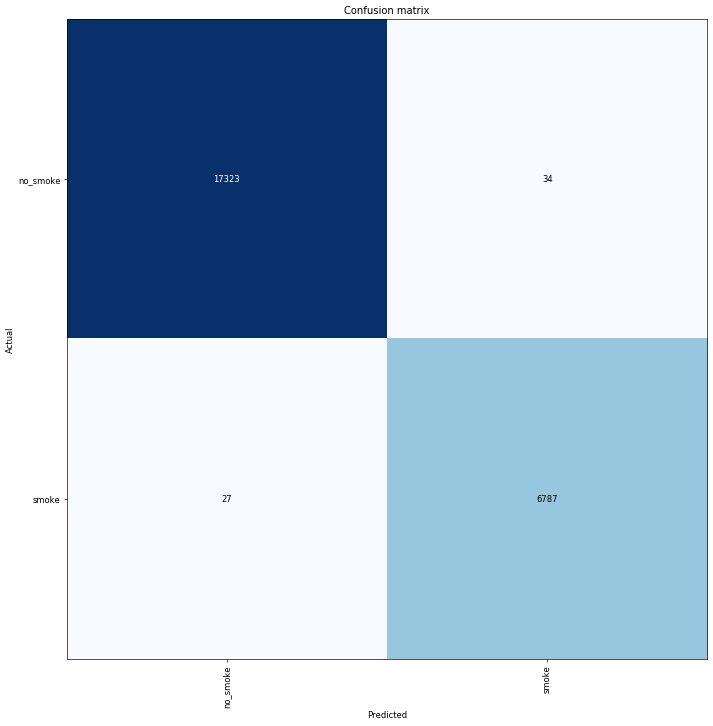

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)